In [6]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [7]:
path_dataset="/work/bb1036/b381362/dataset" 
path_out="/home/b/b381362/output"   

# path_ICON = path_dataset + "/data_rttov_T12_dropupbottom_Reff.nc"
rttov_path_refl_emmis = path_out+ "/output-rttov/rttov-131-data-icon-1to19-26-T12.nc"
rttov_path_rad = path_out + "/output-rttov/rttov-13-data-icon-1-to-36-not-flip.nc"

In [8]:
rttov_path = "/work/bb1036/rttov_share/rttov-131-36-channels-05022013-07182022.nc"

In [10]:
rttov_ds_rad = xr.open_dataset(rttov_path_rad).compute()  # write read rttov in a function
rttov_ds_refl_emmi = xr.open_dataset(rttov_path_refl_emmis).compute()    
rttov_ds = xr.open_dataset(rttov_path).compute()   

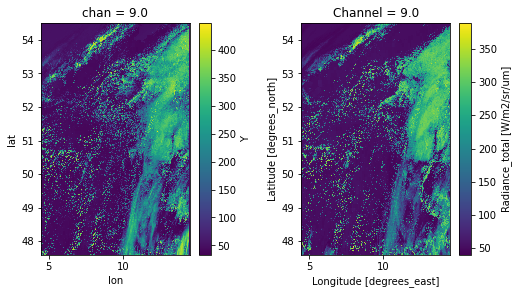

In [5]:
f, axes = plt.subplots(1,2,figsize=(4*2, 1*4*1.066)) #width of 15 inches and 7 inches in height.
f.subplots_adjust(wspace=0.4, hspace=0.4)

axli = axes.ravel()

i = 8
rttov_ds_rad['Y'][i,9:,:].plot(ax = axli[0] )#, vmin=0, vmax=0.12, cmap='jet')
rttov_ds['Radiance_total'][i].plot(ax = axli[1])#, vmin=0, vmax=0.12, cmap='jet')# cmap='cividis', 

# rttov_ds_refl_emmi['bt_refl_total'][i,9:,:].plot(ax = axli[0], vmin=0, vmax=1)
# rttov_ds['BRF_total'][i].plot(ax = axli[1], vmin=0, vmax=1)# cmap='cividis', 


In [6]:
a = rttov_ds['BRF_total'][i]
print('min, max, mean', a.values.min(), a.values.max(), a.values.mean())

min, max, mean 0.0862757 0.8380758 0.24516244


In [7]:
b = rttov_ds_rad['Y'][i,9:,:]
print('min, max, mean', b.values.min(), b.values.max(), b.values.mean())

min, max, mean 33.17343 447.33228 124.19501


In [8]:
b = rttov_ds_refl_emmi['bt_refl_total'][i,9:,:]
print('min, max, mean', b.values.min(), b.values.max(), b.values.mean())

min, max, mean 0.06670213 0.84873414 0.23840187


In [9]:
c = a.values - b.values
print('min, max, mean', c.min(), c.max(), c.mean())

min, max, mean -0.7109682 0.7572621 0.0067605297


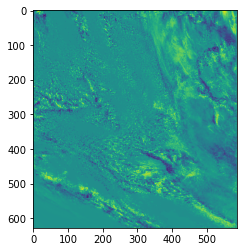

In [10]:
plt.imshow(((rttov_ds_refl_emmi['bt_refl_total'][i,9:,:]).values - rttov_ds['BRF_total'][i].values))

In [4]:
rttov_variable_OPAC = np.zeros((np.shape(rttov_ds['BRF_total'].values)))

rttov_variable_OPAC[:19] = rttov_ds['BRF_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
rttov_variable_OPAC[19:25] = rttov_ds['Radiance_total'][19:25]
rttov_variable_OPAC[25] = rttov_ds['BRF_total'][25] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
rttov_variable_OPAC[26:36] = rttov_ds['Radiance_total'][26:36]

NameError: name 'rttov_ds' is not defined

In [12]:
rttov_variable = np.zeros((np.shape(rttov_ds['BRF_total'].values)))
rttov_variable[:19] = rttov_ds_refl_emmi['bt_refl_total'][:19,9:,] #refl 1-19, 26 rad 20-25 and 27-36
rttov_variable[19:25] = rttov_ds_rad['Y'][19:25,9:,]
rttov_variable[25] = rttov_ds_refl_emmi['bt_refl_total'][19,9:,] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
rttov_variable[26:36] = rttov_ds_rad['Y'][26:36,9:,]


In [18]:
rttov_variable = rttov_variable.transpose(1, 2, 0)

In [19]:
X_flated = rttov_variable.reshape(-1,rttov_variable.shape[2]) # #np.stack(X_list, axis=-1)
X_flated.shape

(369892, 36)

In [ ]:
df_normalized = preprocessing.normalize(X_flated)
df_normalized
# scaler_y1 = preprocessing.normalize.fit(X_flated) 

NameError: name 'preprocessing' is not defined

In [ ]:

transformer = preprocessing.MinMaxScaler(feature_range = (0,1))
scaled_data = transformer.fit_transform(X_flated)



NameError: name 'preprocessing' is not defined

In [ ]:
n =35
scaled_data[n].min(), scaled_data[n].max(), scaled_data[n].mean()

NameError: name 'scaled_data' is not defined

In [31]:
scaled_data.shape

(369892, 36)

In [27]:
y_normal = transformer.inverse_transform(scaled_data)

In [28]:
print("ssim: " + str(ssim(y_normal, X_flated)) + " rmse: " + str(mean_squared_error(y_normal, X_flated)))


ssim: 0.9999999999999937 rmse: 1.6454657840685225e-32


In [23]:
from sklearn.decomposition import PCA
from sklearn import preprocessing


# # df_normalized = preprocessing.normalize(X_flated)
# scaler_y1 = preprocessing.normalize.fit(X_flated)  #Standardize features by removing the mean and scaling to unit variance
# X_scaled1 = scaler_y.transform(X_flated)

scaler_y = preprocessing.StandardScaler().fit(X_scaled)  #Standardize features by removing the mean and scaling to unit variance
X_scaled = scaler_y.transform(X_scaled)
# X_scaled = X_scaled
    
pca = PCA(n_components=6)
pca.fit(X_scaled)
pca_data1 = pca.transform(X_scaled)

# pca_samples = pca.transform(samples)
print(pca.inverse_transform(pca_data1).shape)
inv_data = pca.inverse_transform(pca_data1)

NameError: name 'X_scaled' is not defined

In [ ]:
# for inverse transformation
inversed_scaler =  scaler_y.inverse_transform(inv_data)
inversed_scaler =  scaler_y1.inverse_transform(inversed_scaler)


In [69]:
columns = 36 #np.shape(x)[1]
x_3d = np.zeros((columns, 628, 589)) #len(lat_ds) , len(lon_ds))) # 628,589)) 

for i in range(columns):
    x_3d[i,:,:] = inversed_scaler[:,i].reshape(-1, 589) #len(lon_ds))

In [70]:
rttov_variable.shape

(628, 589, 36)

In [71]:
x_3d =x_3d.transpose(1,2,0)
x_3d.shape

(628, 589, 36)

In [5]:

from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import make_scorer, check_scoring, mean_squared_error


print("ssim: " + str(ssim(rttov_variable[0], x_3d[0])) + " rmse: " + str(mean_squared_error(rttov_variable[0], x_3d[0])))


NameError: name 'rttov_variable' is not defined

In [14]:
import pandas as pd
X_flated = rttov_variable_OPAC.transpose(1, 2,0).reshape(-1,rttov_variable_OPAC.transpose(1, 2,0).shape[2]) # #np.stack(X_list, axis=-1)
print(np.shape(X_flated))
df_rttov_variable_OPAC=pd.DataFrame(X_flated) 
df_rttov_variable_OPAC.columns = [f"Chan_{int(i)}" for i in rttov_ds['Channel'].values] # #[f"{i}" for i in range(rttov_variable.shape[0])]

X_flated = rttov_variable.transpose(1, 2,0).reshape(-1,rttov_variable.transpose(1, 2,0).shape[2]) # #np.stack(X_list, axis=-1)
print(np.shape(X_flated))
df_rttov_variable=pd.DataFrame(X_flated) 
df_rttov_variable.columns = [f"Chan_{int(i)}" for i in rttov_ds['Channel'].values]

NameError: name 'rttov_variable_OPAC' is not defined

In [15]:
df_rttov_variable_OPAC.head()

NameError: name 'df_rttov_variable_OPAC' is not defined

In [16]:
import pandas as pd

rad_rttov_variable_OPAC = rttov_ds['Radiance_total'].values
rad_rttov_variable = rttov_ds_rad['Y'].values


X_flated = rad_rttov_variable.transpose(1, 2,0).reshape(-1,rad_rttov_variable.transpose(1, 2,0).shape[2]) # #np.stack(X_list, axis=-1)
print(np.shape(X_flated))
rad_df_rttov_variable=pd.DataFrame(X_flated) 
rad_df_rttov_variable.columns = [f"Ch_{int(i)}" for i in rttov_ds['Channel'].values]

X_flated = rad_rttov_variable_OPAC.transpose(1, 2,0).reshape(-1,rad_rttov_variable_OPAC.transpose(1, 2,0).shape[2]) # #np.stack(X_list, axis=-1)
print(np.shape(X_flated))
rad_df_rttov_variable_OPAC=pd.DataFrame(X_flated) 
rad_df_rttov_variable_OPAC.columns = [f"Ch_{int(i)}" for i in rttov_ds['Channel'].values]

(375193, 36)
(369892, 36)


In [21]:
### plot only of refl and rad no solo radiances.........

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

au_corr = get_top_abs_correlations(rad_df_rttov_variable, 20)
print("Top Absolute Correlations")
print(au_corr)

Top Absolute Correlations
Ch_4   Ch_12    0.999995
Ch_13  Ch_14    0.999992
Ch_11  Ch_12    0.999965
Ch_4   Ch_11    0.999939
Ch_1   Ch_13    0.999931
Ch_2   Ch_16    0.999921
Ch_3   Ch_10    0.999894
Ch_1   Ch_14    0.999885
Ch_3   Ch_9     0.999804
Ch_1   Ch_4     0.999674
       Ch_12    0.999643
       Ch_11    0.999601
Ch_10  Ch_11    0.999538
Ch_31  Ch_32    0.999458
Ch_9   Ch_10    0.999412
Ch_4   Ch_13    0.999390
Ch_8   Ch_9     0.999353
Ch_12  Ch_13    0.999333
Ch_4   Ch_14    0.999268
Ch_11  Ch_13    0.999268
dtype: float64


In [31]:
rad_df_rttov_variable.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Ch_1,Ch_2,Ch_3,Ch_4,Ch_5,Ch_6,Ch_7,Ch_8,Ch_9,Ch_10,Ch_11,Ch_12,Ch_13,Ch_14,Ch_15,Ch_16,Ch_17,Ch_18,Ch_19,Ch_20,Ch_21,Ch_22,Ch_23,Ch_24,Ch_25,Ch_26,Ch_27,Ch_28,Ch_29,Ch_30,Ch_31,Ch_32,Ch_33,Ch_34,Ch_35,Ch_36
Ch_1,1.0,0.93,1.0,1.0,0.93,0.83,0.81,0.99,1.0,1.0,1.0,1.0,1.0,1.0,0.96,0.93,0.93,0.82,0.9,0.24,-0.35,-0.32,-0.55,-0.54,-0.65,0.4,-0.32,-0.42,-0.69,-0.68,-0.66,-0.65,-0.55,-0.47,-0.44,-0.37
Ch_2,0.93,1.0,0.92,0.93,0.99,0.85,0.78,0.91,0.92,0.92,0.93,0.93,0.93,0.93,1.0,1.0,0.99,0.8,0.91,0.33,-0.16,-0.13,-0.34,-0.37,-0.46,0.32,-0.19,-0.31,-0.52,-0.52,-0.49,-0.49,-0.41,-0.34,-0.33,-0.32
Ch_3,1.0,0.92,1.0,1.0,0.92,0.82,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.95,0.92,0.93,0.84,0.91,0.23,-0.37,-0.34,-0.57,-0.56,-0.67,0.42,-0.32,-0.43,-0.7,-0.7,-0.68,-0.66,-0.56,-0.49,-0.46,-0.38
Ch_4,1.0,0.93,1.0,1.0,0.93,0.83,0.81,0.99,1.0,1.0,1.0,1.0,1.0,1.0,0.96,0.93,0.94,0.83,0.9,0.24,-0.35,-0.32,-0.55,-0.53,-0.65,0.4,-0.31,-0.42,-0.69,-0.68,-0.66,-0.65,-0.54,-0.47,-0.44,-0.36
Ch_5,0.93,0.99,0.92,0.93,1.0,0.91,0.85,0.91,0.92,0.92,0.93,0.93,0.93,0.93,0.99,0.99,0.97,0.76,0.88,0.41,-0.1,-0.069,-0.3,-0.33,-0.44,0.26,-0.14,-0.26,-0.5,-0.49,-0.47,-0.46,-0.37,-0.3,-0.27,-0.25
Ch_6,0.83,0.85,0.82,0.83,0.91,1.0,0.98,0.8,0.81,0.82,0.83,0.83,0.83,0.83,0.85,0.85,0.82,0.53,0.68,0.7,0.17,0.2,-0.083,-0.1,-0.26,-0.046,0.12,0.033,-0.31,-0.29,-0.27,-0.26,-0.11,-0.017,0.016,0.085
Ch_7,0.81,0.78,0.8,0.81,0.85,0.98,1.0,0.79,0.8,0.8,0.81,0.81,0.81,0.81,0.8,0.78,0.77,0.53,0.66,0.72,0.13,0.17,-0.14,-0.18,-0.34,-0.0067,0.091,-0.011,-0.39,-0.36,-0.34,-0.33,-0.18,-0.076,-0.038,0.073
Ch_8,0.99,0.91,1.0,0.99,0.91,0.8,0.79,1.0,1.0,1.0,1.0,0.99,0.99,0.99,0.94,0.91,0.93,0.86,0.92,0.21,-0.39,-0.35,-0.58,-0.57,-0.68,0.44,-0.33,-0.45,-0.72,-0.71,-0.69,-0.68,-0.58,-0.5,-0.48,-0.39
Ch_9,1.0,0.92,1.0,1.0,0.92,0.81,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.95,0.92,0.93,0.85,0.91,0.22,-0.38,-0.34,-0.57,-0.56,-0.67,0.42,-0.32,-0.44,-0.71,-0.7,-0.68,-0.67,-0.57,-0.49,-0.47,-0.38
Ch_10,1.0,0.92,1.0,1.0,0.92,0.82,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.95,0.92,0.93,0.84,0.9,0.23,-0.37,-0.33,-0.57,-0.55,-0.66,0.41,-0.32,-0.43,-0.7,-0.69,-0.67,-0.66,-0.56,-0.48,-0.46,-0.37


In [18]:
df_rttov_variable_OPAC.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Chan_1,Chan_2,Chan_3,Chan_4,Chan_5,Chan_6,Chan_7,Chan_8,Chan_9,Chan_10,Chan_11,Chan_12,Chan_13,Chan_14,Chan_15,Chan_16,Chan_17,Chan_18,Chan_19,Chan_20,Chan_21,Chan_22,Chan_23,Chan_24,Chan_25,Chan_26,Chan_27,Chan_28,Chan_29,Chan_30,Chan_31,Chan_32,Chan_33,Chan_34,Chan_35,Chan_36
Chan_1,1.0,0.8892,0.9981,0.9995,0.9091,0.8527,0.8574,0.9937,0.9968,0.9988,0.9995,0.9995,0.9999,0.9999,0.9279,0.8871,0.901,0.8162,0.8865,0.5424,0.05794,0.09565,-0.2425,-0.4057,-0.5266,0.3142,-0.3185,-0.3357,-0.5792,-0.5627,-0.5438,-0.5342,-0.4213,-0.3466,-0.3269,-0.3021
Chan_2,0.8892,1.0,0.8772,0.897,0.9894,0.8751,0.8259,0.8677,0.8746,0.8785,0.893,0.8965,0.8869,0.8858,0.9956,0.9999,0.9906,0.7874,0.9156,0.6276,0.2774,0.3069,0.02302,-0.1988,-0.2862,0.213,-0.1537,-0.1875,-0.3516,-0.347,-0.3281,-0.3224,-0.2459,-0.1894,-0.1827,-0.2465
Chan_3,0.9981,0.8772,1.0,0.9983,0.8967,0.8413,0.8486,0.9986,0.9998,0.9999,0.999,0.9985,0.9977,0.9976,0.9176,0.8744,0.895,0.8269,0.8903,0.5328,0.04549,0.08324,-0.2544,-0.4162,-0.536,0.3265,-0.3137,-0.3355,-0.5857,-0.5688,-0.5481,-0.5383,-0.4247,-0.3508,-0.3309,-0.2995
Chan_4,0.9995,0.897,0.9983,1.0,0.9141,0.8544,0.8566,0.9945,0.9973,0.9988,0.9999,1.0,0.9992,0.9991,0.9342,0.8948,0.9092,0.8213,0.8937,0.5462,0.06599,0.1034,-0.2329,-0.3981,-0.5178,0.3118,-0.3084,-0.3271,-0.5701,-0.554,-0.5343,-0.5247,-0.4127,-0.3389,-0.3197,-0.2976
Chan_5,0.9091,0.9894,0.8967,0.9141,1.0,0.9286,0.8898,0.8869,0.8941,0.8981,0.9108,0.9136,0.9074,0.9068,0.9904,0.9892,0.9799,0.7647,0.8993,0.6952,0.3262,0.3579,0.05255,-0.171,-0.2746,0.1613,-0.125,-0.1495,-0.3417,-0.3322,-0.3141,-0.3074,-0.2156,-0.1508,-0.1402,-0.189
Chan_6,0.8527,0.8751,0.8413,0.8544,0.9286,1.0,0.9857,0.831,0.8387,0.843,0.8523,0.854,0.8528,0.8532,0.8853,0.8745,0.8594,0.5831,0.7463,0.8756,0.5277,0.5605,0.2359,0.03399,-0.1082,-0.09588,0.06689,0.0865,-0.1724,-0.1488,-0.1334,-0.1239,0.005126,0.0851,0.1032,0.08435
Chan_7,0.8574,0.8259,0.8486,0.8566,0.8898,0.9857,1.0,0.8407,0.8468,0.8499,0.8556,0.8563,0.8578,0.8585,0.8452,0.8245,0.8207,0.5932,0.7333,0.8728,0.4807,0.5164,0.17,-0.03195,-0.1831,-0.06016,0.03199,0.04531,-0.242,-0.2137,-0.1988,-0.1895,-0.05001,0.03585,0.05871,0.07469
Chan_8,0.9937,0.8677,0.9986,0.9945,0.8869,0.831,0.8407,1.0,0.9994,0.9978,0.9956,0.9948,0.9929,0.9928,0.9088,0.8645,0.8911,0.8387,0.8957,0.5262,0.03902,0.07662,-0.2596,-0.4246,-0.5415,0.3405,-0.307,-0.3355,-0.5888,-0.5717,-0.5493,-0.5397,-0.4272,-0.3549,-0.3351,-0.299
Chan_9,0.9968,0.8746,0.9998,0.9973,0.8941,0.8387,0.8468,0.9994,1.0,0.9995,0.9981,0.9975,0.9963,0.9962,0.9151,0.8716,0.8943,0.8314,0.8928,0.5319,0.04464,0.08235,-0.255,-0.4184,-0.5373,0.3307,-0.3104,-0.3346,-0.5862,-0.5692,-0.5478,-0.5381,-0.4248,-0.3514,-0.3315,-0.2985
Chan_10,0.9988,0.8785,0.9999,0.9988,0.8981,0.843,0.8499,0.9978,0.9995,1.0,0.9994,0.999,0.9985,0.9984,0.9188,0.8759,0.8949,0.8232,0.888,0.5337,0.04633,0.0841,-0.2538,-0.4146,-0.5351,0.3231,-0.3157,-0.3359,-0.5852,-0.5683,-0.548,-0.5382,-0.4244,-0.3501,-0.3301,-0.2997


/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


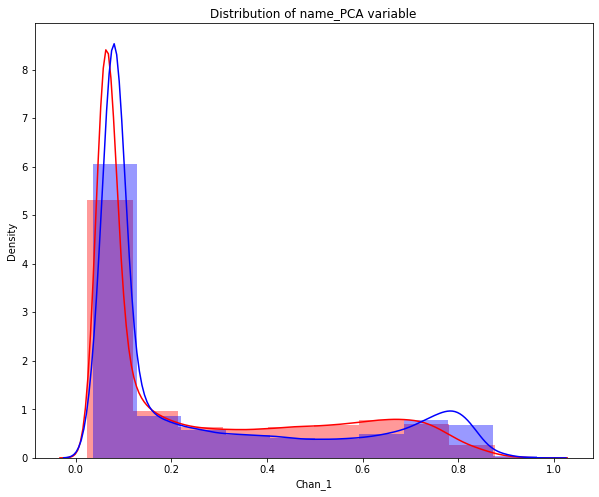

In [19]:
import seaborn as sns

name_PCA = "Chan_1"
f, ax = plt.subplots(figsize=(10,8))
x = df_rttov_variable_OPAC[name_PCA]
y = df_rttov_variable[name_PCA]
ax = sns.distplot(y, bins=10, color='red')

ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of name_PCA variable")
plt.show()

In [20]:
df_rttov_variable.head()

,Chan_1,Chan_2,Chan_3,Chan_4,Chan_5,Chan_6,Chan_7,Chan_8,Chan_9,Chan_10,...,Chan_27,Chan_28,Chan_29,Chan_30,Chan_31,Chan_32,Chan_33,Chan_34,Chan_35,Chan_36
0,0.059332,0.396899,0.076343,0.090668,0.326667,0.174111,0.067623,0.090107,0.082040,0.071822,...,1.231835,2.611884,7.373108,5.081609,8.035026,7.547256,4.887306,3.856278,3.230950,2.382105
1,0.059292,0.396745,0.076254,0.090632,0.326586,0.174095,0.067522,0.089979,0.081935,0.071745,...,1.229644,2.605694,7.380816,5.088775,8.039311,7.544522,4.881190,3.854528,3.230433,2.382415
2,0.059291,0.396613,0.076290,0.090644,0.326475,0.174072,0.067433,0.090031,0.081977,0.071776,...,1.240044,2.614200,7.278270,5.034613,7.945300,7.464652,4.859797,3.846624,3.226307,2.382555
3,0.059312,0.396457,0.076408,0.090686,0.326317,0.174038,0.067334,0.090201,0.082116,0.071877,...,1.258941,2.632504,7.209677,4.997473,7.881471,7.411654,4.848351,3.843096,3.224288,2.382519
4,0.059296,0.396492,0.076340,0.090661,0.326367,0.174049,0.067356,0.090104,0.082036,0.071819,...,1.274298,2.640409,7.194626,4.989034,7.867069,7.399302,4.845360,3.842524,3.224029,2.382577


In [77]:
df_rttov_variable_OPAC.describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,...,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000
mean,0.263083,0.493002,0.249261,0.267687,0.450051,0.315928,0.192828,0.237910,0.245162,0.252129,...,1.145039,2.348613,5.958423,4.186805,6.690482,6.365339,4.338374,3.510042,3.001244,2.305557
std,0.261344,0.221036,0.209143,0.230225,0.215841,0.208334,0.155317,0.165301,0.192107,0.221868,...,0.152439,0.389758,1.508245,0.794465,1.507704,1.321883,0.565832,0.320687,0.199600,0.053270
min,0.035435,0.025961,0.081924,0.060021,0.016612,0.013512,0.005194,0.090129,0.086276,0.075679,...,0.422331,0.603166,1.018183,1.410097,1.644078,1.776951,1.855227,1.869498,1.879552,1.900704
25%,0.077671,0.391451,0.102148,0.108536,0.350845,0.201612,0.091205,0.123764,0.111251,0.095625,...,1.056415,2.239453,5.184503,3.822241,6.005127,5.794278,4.197470,3.463391,2.981045,2.304251
50%,0.101216,0.444626,0.111660,0.125589,0.381568,0.232477,0.114970,0.130860,0.118829,0.106546,...,1.172934,2.488423,6.164995,4.315933,6.938914,6.592079,4.518447,3.637211,3.082868,2.323843
75%,0.428570,0.598264,0.386302,0.411031,0.556603,0.407744,0.289089,0.349778,0.372721,0.396024,...,1.257248,2.601506,7.234564,4.844267,7.951478,7.460834,4.730813,3.705126,3.116489,2.334415
max,0.964338,1.041801,0.872501,0.910835,0.920470,0.749351,0.520727,0.779452,0.838076,0.895692,...,1.443074,2.921050,8.727314,5.641475,9.315025,8.559787,5.030950,3.848166,3.193463,2.353092


In [78]:
df_rttov_variable.describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,...,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000
mean,0.263548,0.449336,0.244359,0.264029,0.403567,0.268879,0.152063,0.227973,0.238402,0.248882,...,1.237244,2.498726,5.985974,4.351410,6.714878,6.391334,4.462237,3.644663,3.108427,2.355093
std,0.247463,0.206011,0.206164,0.222616,0.188903,0.159868,0.096937,0.169164,0.191896,0.216617,...,0.149254,0.367930,1.422095,0.779697,1.389781,1.218272,0.528527,0.305188,0.189911,0.049109
min,0.024432,0.022005,0.061488,0.044585,0.010976,0.010548,0.004471,0.069784,0.066702,0.055330,...,0.469062,0.670931,1.131203,1.489285,1.769651,1.902876,1.955443,1.953101,1.946553,1.939020
25%,0.064499,0.331770,0.078608,0.087563,0.295995,0.167853,0.078178,0.093048,0.084479,0.074494,...,1.170007,2.412128,5.163401,3.929756,5.993587,5.787291,4.323222,3.599114,3.089543,2.355853
50%,0.116619,0.388555,0.117680,0.129492,0.333699,0.195819,0.105169,0.121299,0.119323,0.116978,...,1.257348,2.619082,6.001427,4.393473,6.798523,6.486321,4.587906,3.740152,3.170914,2.372019
75%,0.467394,0.589534,0.416068,0.445810,0.533772,0.379552,0.244467,0.369064,0.398623,0.428881,...,1.345521,2.734753,7.290349,5.048810,7.961809,7.479034,4.863590,3.842197,3.222965,2.379312
max,0.970064,1.030738,0.880152,0.915947,0.885531,0.676670,0.437006,0.794244,0.848734,0.901255,...,1.520578,3.031286,8.897282,5.874233,9.363666,8.654025,5.227445,4.027227,3.327690,2.395352


In [ ]:
rttov_variable = np.zeros((np.shape(rttov_ds_rad['Y'].values)))

 


rttov_variable = np.zeros((np.shape(rttov_ds['Radiance_total'].values)))

# print("****************variables shape ", np.shape(rttov_ds_refl_emmi['bt_refl_total'].values), np.shape(rttov_variable), np.shape(rttov_ds_rad['Y'].values))


# rttov_variable[:19] = rttov_ds_refl_emmi['bt_refl_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
# rttov_variable[19:25] = rttov_ds_rad['Y'][19:25]
# rttov_variable[25] = rttov_ds_refl_emmi['bt_refl_total'][19] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
# rttov_variable[26:36] = rttov_ds_rad['Y'][26:36]

rttov_variable[:19] = rttov_ds['BRF_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
rttov_variable[19:25] = rttov_ds['Radiance_total'][19:25]
rttov_variable[25] = rttov_ds['BRF_total'][25] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
rttov_variable[26:36] = rttov_ds['Radiance_total'][26:36]



print("===================================== Training output ====================================== ")

print("****************variables shape training_output", np.shape(rttov_variable))

# rttov_ds_rad.close()
# rttov_ds_refl_emmi.close()
rttov_ds.close()

#rttov_bands =rttov_ds_rad['chan'].values
# print('rttov_variable',np.shape(rttov_variable))

#output then I dont neet to cut   !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# rttov_variable_ds = xr.DataArray( rttov_variable[:,9:,], dims=['chan','lat','lon'], coords= [rttov_ds.chan.data, rttov_ds_refl_emmi.lat.data[9:], rttov_ds_refl_emmi.lon.data ])
rttov_variable_ds = xr.DataArray( rttov_variable, dims=['channel','lat','lon'], coords= [rttov_ds.Channel.data, rttov_ds.Latitude.data, rttov_ds.Longitude.data])   

In [ ]:
    for i in range(len(column)):
        count_nan = df[i].isnull().sum()
        print ('In band {} values NaN: {}'.format(column[i], count_nan))  
